<a href="https://colab.research.google.com/github/SubaruFallout/BasicOfDigitalImageProcessing/blob/master/constructionOfMorphologicalSkeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Построение морфологического скелета** <br>
Разработать программу построения морфологического скелета изображения и восстановления изображения по морфологическому скелету для бинарных изображений и различных структурирующих элементов.

Содержание отчета: <br>
&emsp;Исходные изображения <br>
&emsp;Код программы (для Jupiter Notebook) <br>
&emsp;Результат работы программы <br>
&emsp;Срок 01.11.2022 <br>

In [120]:
# import the necessary libraries
%matplotlib inline
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

In [125]:
# Skeleton construction algorithm
# Return skeletal subset
def constructSkelet(orig_img, struct_element):
    img = orig_img.copy()
    skelets = []

    while True:
        eroded_img = cv2.erode(img, struct_element)
        if cv2.countNonZero(eroded_img) == 0:
            skelets.append(img)
            break

        opened_img = cv2.dilate(eroded_img, struct_element)
        skelets.append(cv2.subtract(img, opened_img))
        img = eroded_img.copy()

    return skelets

In [126]:
# Recovery image from skelet
# Return recovered image
def recoverFromSkelet(skelets, struct_element):
    img = np.zeros(skelets[0].shape, np.uint8)
    n = len(skelets)
    n -= 1

    while True:
        img = cv2.bitwise_or(img, skelets[n])
        if n == 0:
            break

        img = cv2.dilate(img, struct_element)
        n -= 1
    
    return img

In [188]:
# For every image make skelet, recover from skelet, show results in code
def run(files, struct_element):
    # Show struct element
    plt.figure(figsize=(1, 1))
    plt.title("Struct element", fontsize=10)
    plt.imshow(struct_element, 'gray')
    plt.axis("off")
    plt.show()

    for file in files:
        img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)

        skelets = constructSkelet(img, struct_element)

        recovered_img = recoverFromSkelet(skelets, struct_element)

        # make normal skelet
        full_skelet = np.zeros(img.shape, np.uint8)
        for skelet_part in skelets:
            full_skelet = cv2.bitwise_or(full_skelet, skelet_part)

        # Show output
        f, out = plt.subplots(1, 2)
        f.set_figwidth(20)
        f.set_figheight(20)
        out[0].set_title("Recovered image")
        out[0].axis("off")
        out[0].imshow(recovered_img, 'gray', interpolation='bicubic')
        
        out[1].set_title("Its skelet")
        out[1].axis("off")
        out[1].imshow(full_skelet, 'gray')

        plt.show()


**Starting point**

In [190]:
# Get image names
directory = "binary_images"
files = []

for filename in os.listdir(directory):
    files.append(os.path.join(directory, filename))

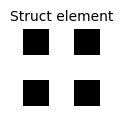

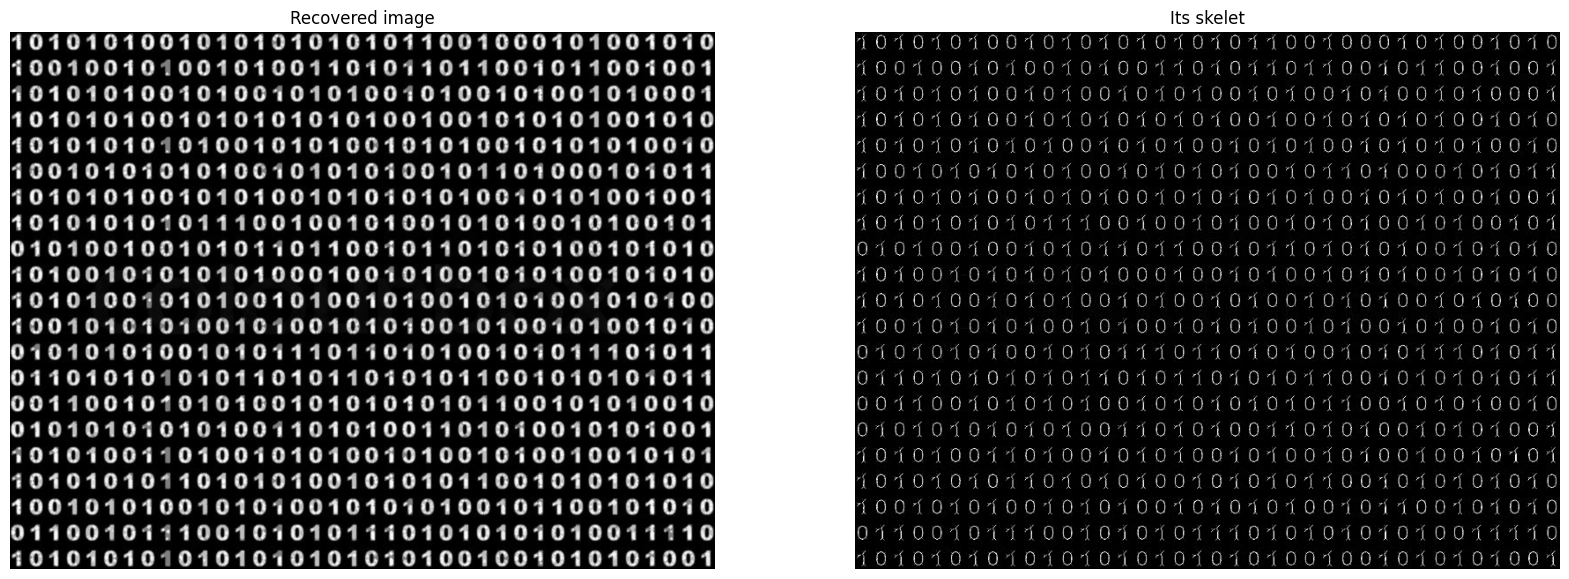

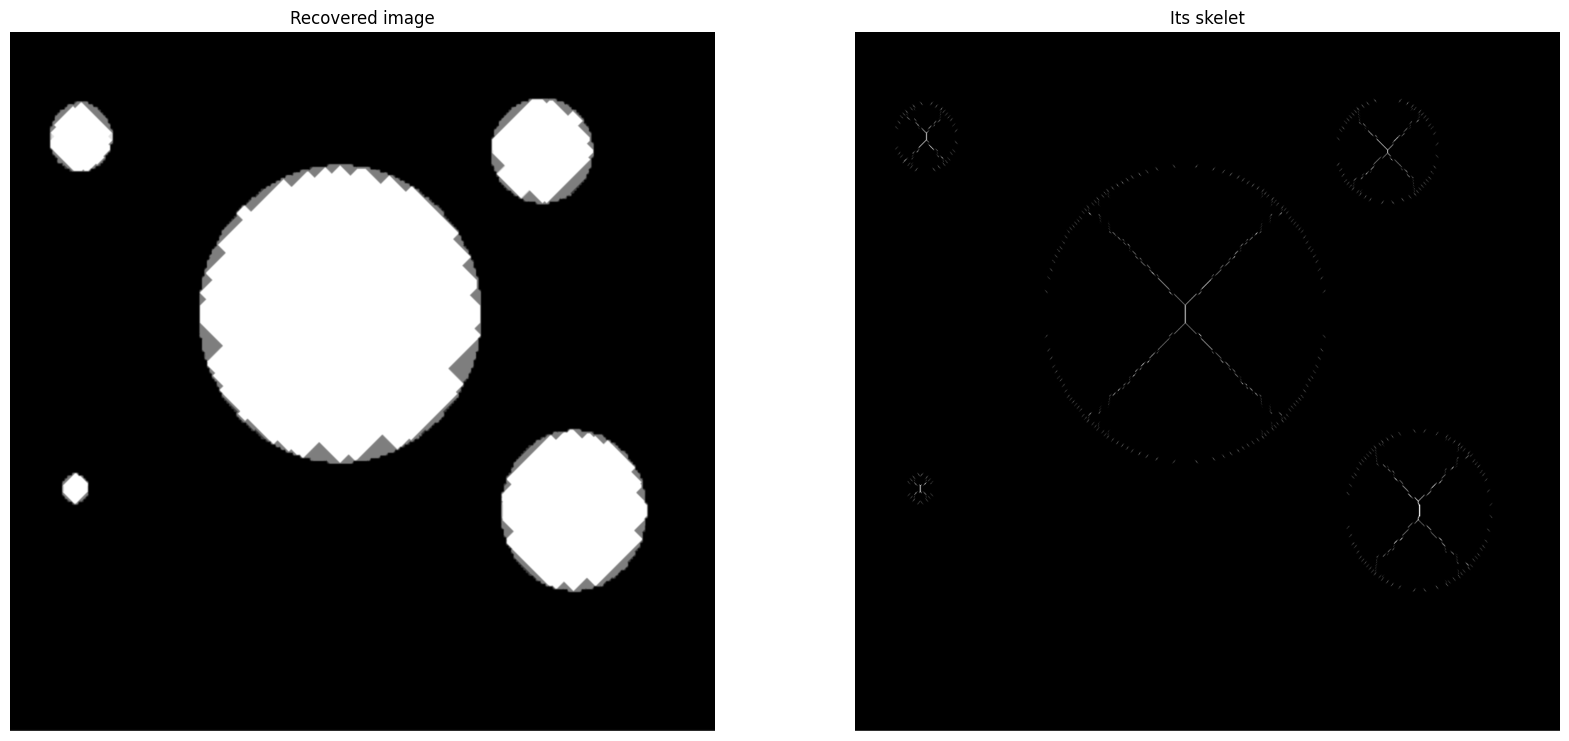

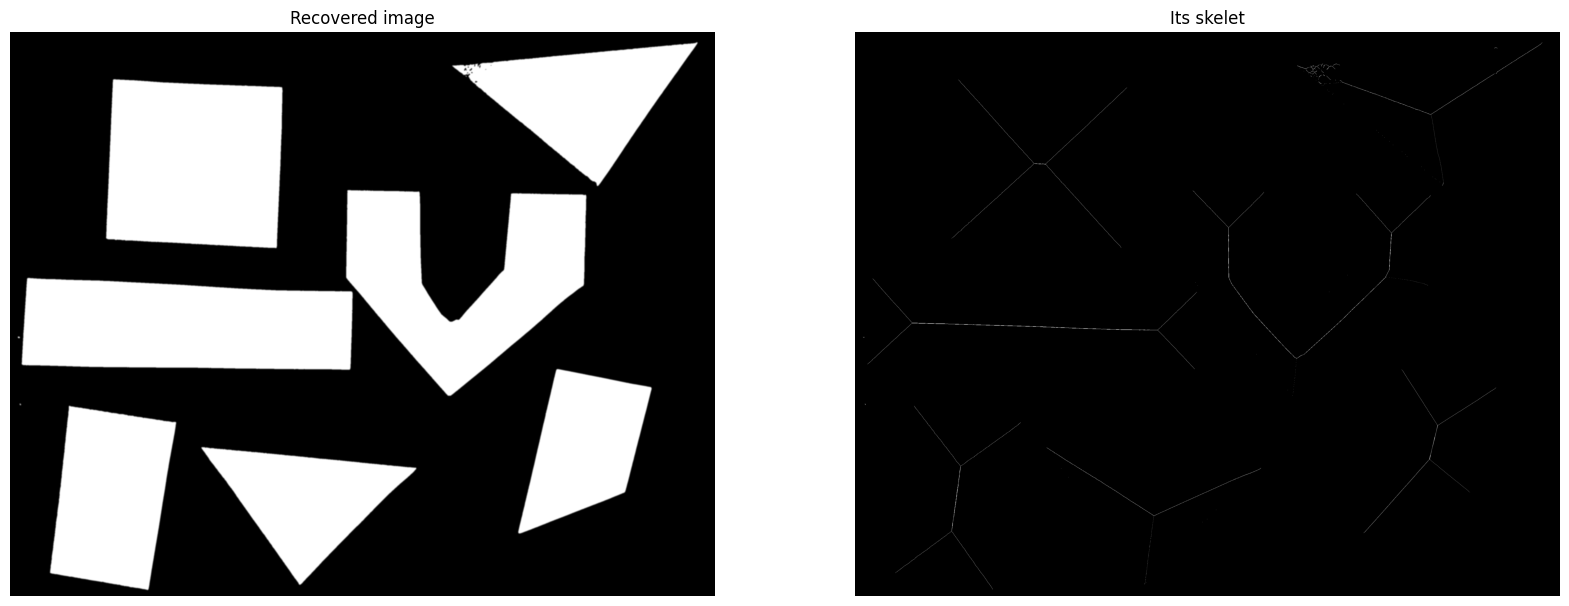

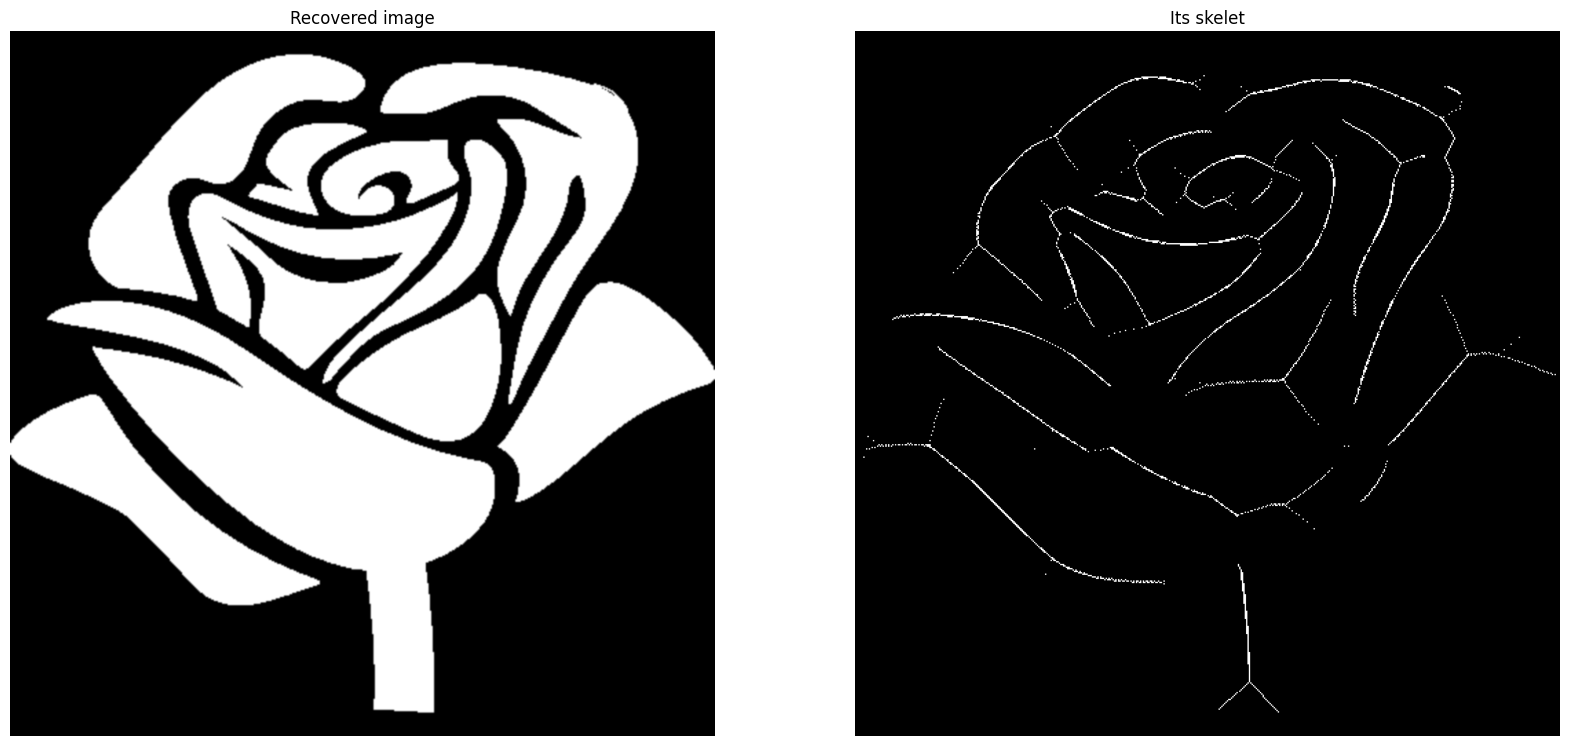

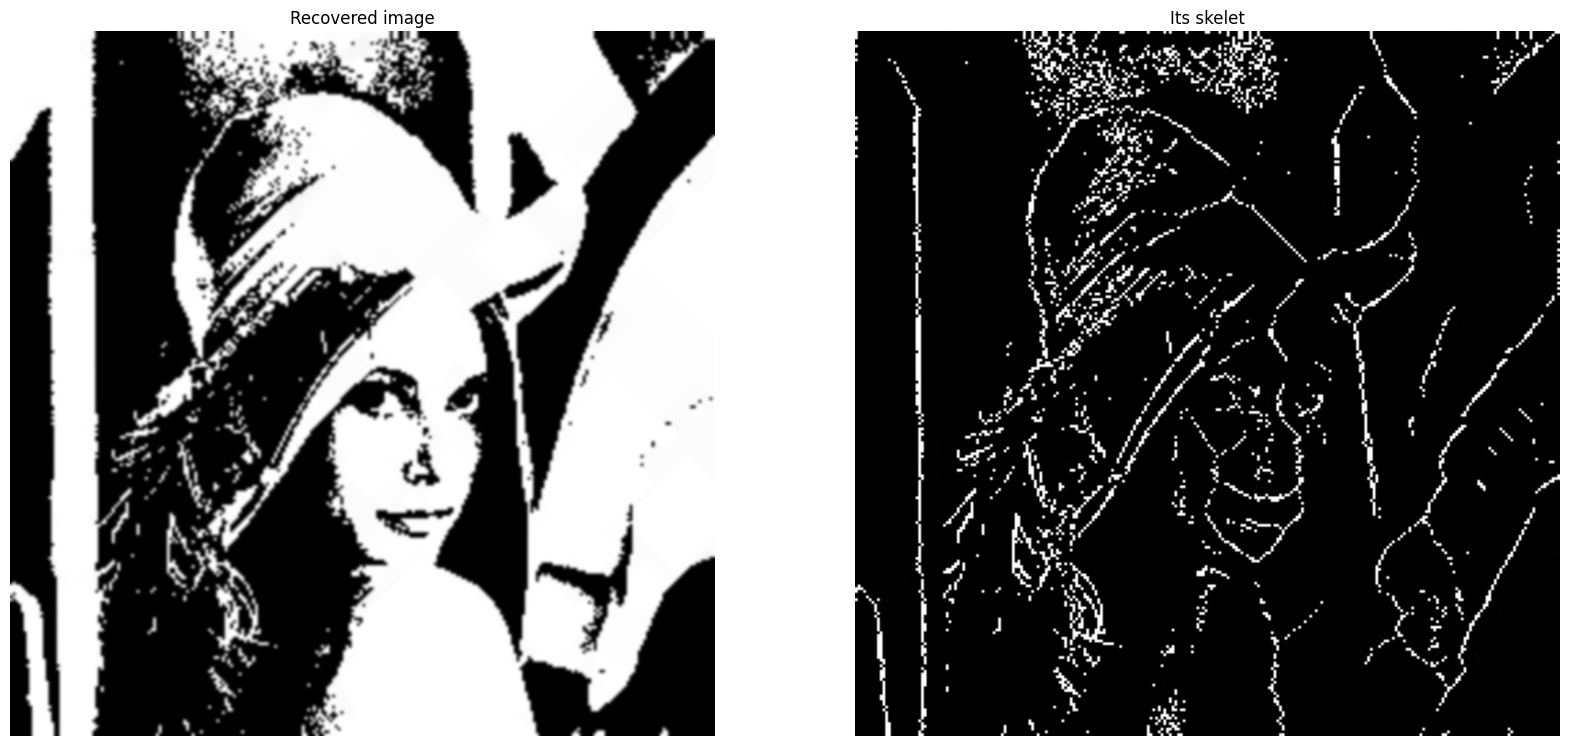

In [192]:
struct_element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

run(files, struct_element)